<a href="https://colab.research.google.com/github/AisIzmailova/Aisulu-Izmailova/blob/master/DL_Introduction_to_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tensorflow fundamentals:
- Introduction to tensors
- Getting information from tensors
- Manipulating tensors
- Tensors & NumPy
- Using @tf.function
- Using GPUs with Tensorflow

##Introduction to tensors

In [ ]:
#import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.13.0


In [ ]:
#Creating tensors with tf.constant()
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [ ]:
#Check the number of dimensions of a tensor
scalar.ndim

0

In [ ]:
#Create a vector
vector = tf.constant([10,10])
vector.ndim

1

In [ ]:
#Create a matrix
matrix = tf.constant([[10,7],[7,10]])
matrix.ndim

2

In [ ]:
another_matrix = tf.constant([[10.,7.],[3.,2.],[8.,9.]],dtype=tf.float16)
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 8.,  9.]], dtype=float16)>

In [ ]:
another_matrix.ndim

2

In [ ]:
#Create tensor
tensor = tf.constant([[[1,2,3],
                     [4,5,6]],
                      [[7,8,9],
                       [10,11,12]],
                      [[13,14,15],
                       [16,17,18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [ ]:
tensor.ndim

3

###Recap
- Scalar: a single number
- Vector: a number with direction (e.g. wind speed and direction)
- Matrix: a 2-dimensional array of numbers
- Tensor: as n-dimensional array of numbers (when n can be any number, a-dimensional tensor is scalar, a 1-dimensional tensor is a vector)

In [ ]:
#Creating tensors with variable
changeable_tensor = tf.Variable([10,7])
unchangeable_tensor = tf.constant([10,7])
changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [ ]:
#Change one of the elements in our changeable tensor
#changeable_tensor[0]=7

In [ ]:
#Use assing to change the tensor
changeable_tensor[0].assign(7)

<tf.Variable 'UnreadVariable' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

In [ ]:
#Try to change unchangeable tensor
#unchangeable_tensor[0].assign(7)

###Create random tensors
Random tensors are tensors of some arbitary size which contain random numbers.

In [ ]:
#Create two random tensors
random_1 = tf.random.Generator.from_seed(42)
random_1 = random_1.normal(shape=(3,2))
random_2 = tf.random.Generator.from_seed(42)
random_2 = random_2.normal(shape=(3,2))
random_1,random_2, random_1==random_2

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>)

In [ ]:
#Shuffle the order of elements in a tensor
not_shuffled = tf.constant([[10,7],
                           [3,4],
                           [2,5]])
not_shuffled.ndim

2

In [ ]:
tf.random.set_seed(42) #global random seed
shuffled = tf.random.shuffle(not_shuffled, seed=42) #operation level random seed
shuffled

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

🔰Read: https://www.tensorflow.org/api_docs/python/tf/random/set_seed

If we set global and operation level random seed at the same, they will work in conjuction

In [ ]:
tf.ones([10,7])

<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]], dtype=float32)>

In [ ]:
tf.zeros(shape=(3,4))

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

###Turn NumPy arrays into tensors
The main difference between NumPy arrays and Tensorflow tensors is that tensors can be run on a GPU (much faster for numerical computing).

In [ ]:
#Turn NumPy array into tensors
import numpy as np
numpy_A = np.arange(1,25,dtype=np.int32) #create numpy from 1 to 25
numpy_A
# X = tf.constant() #capital for matrix or tensor
# y = tf.constant() #non-capital for vector

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [ ]:
A = tf.constant(numpy_A, shape=(2,3,4))
B = tf.constant(numpy_A)
A,B

(<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
 array([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],
 
        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]], dtype=int32)>,
 <tf.Tensor: shape=(24,), dtype=int32, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24], dtype=int32)>)

##Getting information from tensors

* Shape - the lenght (number of elements) of each of the dimensions of a tensor
* Rank - the number of tensor dimensions. A scalar rank 0, a vector rank 1, a matrix is rank 2, a tensor has rank n.
* Axis or dimension - a particular dimension of a tensor
* Size - the total number of items in the tensor


In [ ]:
#Create a rak 4 tensor (4 dimensions)
rank_4_tensor = tf.zeros(shape=[2,3,4,5])
rank_4_tensor


<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [ ]:
rank_4_tensor.shape, rank_4_tensor.ndim, tf.size(rank_4_tensor)

(TensorShape([2, 3, 4, 5]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=120>)

In [ ]:
#Get various attributes of tensor
print("Datatype of every element: ", rank_4_tensor.dtype)
print("Number of dimensions (rank): ", rank_4_tensor.ndim)
print("Shape of tensor: ", rank_4_tensor.shape)
print("Elements along the 0 axis: ", rank_4_tensor.shape[0])
print("Elements along the last axis: ", rank_4_tensor.shape[-1])
print("Total number of elements in tensor: ", tf.size(rank_4_tensor).numpy())

Datatype of every element:  <dtype: 'float32'>
Number of dimensions (rank):  4
Shape of tensor:  (2, 3, 4, 5)
Elements along the 0 axis:  2
Elements along the last axis:  5
Total number of elements in tensor:  120


##Indexing Tensor

Tensors can be indexed just like Python list

In [ ]:
#Get the first 2 elements of tensor
rank_4_tensor[:2,:2,:2,:2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [ ]:
#Get the first element from each dimension  from each index except for the final one
rank_4_tensor[:1,:1,:1,:]

<tf.Tensor: shape=(1, 1, 1, 5), dtype=float32, numpy=array([[[[0., 0., 0., 0., 0.]]]], dtype=float32)>

In [ ]:
rank_4_tensor[:1,:1,:,:1]

<tf.Tensor: shape=(1, 1, 4, 1), dtype=float32, numpy=
array([[[[0.],
         [0.],
         [0.],
         [0.]]]], dtype=float32)>

In [ ]:
A[:2,:2,:2]

<tf.Tensor: shape=(2, 2, 2), dtype=int32, numpy=
array([[[ 1,  2],
        [ 5,  6]],

       [[13, 14],
        [17, 18]]], dtype=int32)>

In [ ]:
#Create a rank 2 tensor
rank_2_tensor = tf.constant([[10,7],
                             [3,4]])
rank_2_tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

In [ ]:
some_list=[1,2,3,4]
some_list[-1]

4

In [ ]:
#Get the last item of each row of rank 2 tensor
rank_2_tensor[:,-1]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([7, 4], dtype=int32)>

In [ ]:
#Add in extra dimension to rank 2 tensor
rank_3_tensor = rank_2_tensor[...,tf.newaxis] #three dots means - on every previous axis before the newaxis

In [ ]:
rank_3_tensor

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]], dtype=int32)>

In [ ]:
#Alternative method
tf.expand_dims(rank_2_tensor, axis=-1) #-1 means expand the final axis

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]], dtype=int32)>

In [ ]:
#Expand 0 axis
tf.expand_dims(rank_2_tensor, axis=0) #-1 means expand the final axis

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[10,  7],
        [ 3,  4]]], dtype=int32)>

##Manipulating Tensors

**Basic operations**

`+`, `-`, `*`, `/`

In [ ]:
#Add values to a tensor using addition operator
tensor = tf.constant([[10,7],[3,4]])
tensor+10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

In [ ]:
#Original tensor is unchanged
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

In [ ]:
#Multiplication
tensor*10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

In [ ]:
#Substraction
tensor -10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 0, -3],
       [-7, -6]], dtype=int32)>

In [ ]:
#Tensorflow function
tf.multiply(tensor,10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

##Matrix Multiplication

In ML matrix multiplication is one of the most common tensor operations

There are two rules our tensors/matrices need to fulfill for multiplication:
1. The inner fimension should match
2. The resulting matrix has the shape of the inner dimensions

`tf.matmul`
`tf.tensordot`
`tensor@tensor`

In [ ]:
#Matrix multiplication in Tensorflow (dot product)
print(tensor)
tf.matmul(tensor,tensor)

tf.Tensor(
[[10  7]
 [ 3  4]], shape=(2, 2), dtype=int32)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [ ]:
tensor*tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  49],
       [  9,  16]], dtype=int32)>

In [ ]:
#Matrix multiplication using Python using @
tensor@tensor


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [ ]:
#Multiply tensors of different dimensions
X = tf.constant([[1,2],
                 [3,4],
                 [5,6]])
Y = tf.constant([[7,8],
                 [9,10],
                 [11,12]])
X,Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

In [ ]:
#Below two won't work because of different dimensions
# X@Y
# tf.matmul(X,Y)

In [ ]:
#Change the shape of Y
Y = tf.reshape(Y, shape=(2,3))

In [ ]:
X.shape, Y.shape

(TensorShape([3, 2]), TensorShape([2, 3]))

In [ ]:
X@Y

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [ ]:
tf.matmul(X,Y)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [ ]:
#Transpose tensor - flips the axes
tf.transpose(X), tf.reshape(X, shape=(2,3))

(<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 3, 5],
        [2, 4, 6]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 2, 3],
        [4, 5, 6]], dtype=int32)>)

In [ ]:
tf.matmul(tf.transpose(X),tf.reshape(Y, shape=(3,2)))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

In [ ]:
X,Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[ 7,  8,  9],
        [10, 11, 12]], dtype=int32)>)

In [ ]:
tf.tensordot(tf.transpose(X),tf.reshape(Y, shape=(3,2)), axes=1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

In [ ]:
tf.matmul(tf.reshape(X, shape=(2,3)), tf.transpose(Y))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 50,  68],
       [122, 167]], dtype=int32)>

Generally, when performing matrix multiplication of two tensors and one of the axes doesn't line up, you will transpose (rather than reshape) one of the tensors to satisfy matrix multiplication rules.

##Changing datatype of a tensor

In [ ]:
#Create a new tensor with default datatype float32
B=tf.constant([1.7,7.4])
B, B.dtype

tf.float32

In [ ]:
C=tf.constant([7,10])
C.dtype

tf.int32

In [ ]:
#tensorflow version
tf.__version__

'2.13.0'

🔰 Read: https://www.tensorflow.org/guide/mixed_precision

In [ ]:
#Change datatype from float32 to float16 to reduce precision (memory)
D = tf.cast(B, dtype = tf.float16)
D, D.dtype

(<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1.7, 7.4], dtype=float16)>,
 tf.float16)

In [ ]:
#Change from int32 to float16
E = tf.cast(C, dtype=tf.float16)
E, E.dtype

(<tf.Tensor: shape=(2,), dtype=float16, numpy=array([ 7., 10.], dtype=float16)>,
 tf.float16)

##Aggregating tensors

Aggregating tensors - condensing them from multiple values down to a smaller amount of values.

In [ ]:
#Get the absolute values
D = tf.constant([-7,-10])
D, tf.abs(D)

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ -7, -10], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10], dtype=int32)>)

Forms of aggregation:
* Get the minimum
* Get the maximum
* Get the mean
* Get the sum

In [ ]:
#Create a random tensor with values between 0 to 100 of size 50
E = tf.constant(np.random.randint(0,100, size = 50))
E

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([78, 71, 94, 75, 48, 30, 25, 65, 67, 73, 94, 10, 66, 97, 28, 49, 76,
       10,  7, 70,  9, 61, 93, 20, 31, 82, 25, 73, 95, 94, 47, 13, 48,  3,
       71, 73, 72, 92, 75, 38, 56, 16, 10, 81,  0, 85, 56, 43, 55, 90])>

In [ ]:
tf.size(E), E.shape, E.ndim

(<tf.Tensor: shape=(), dtype=int32, numpy=50>, TensorShape([50]), 1)

In [ ]:
#Get the minimum
tf.reduce_min(E)

<tf.Tensor: shape=(), dtype=int64, numpy=0>

In [ ]:
#Get the maximum
tf.reduce_max(E)

<tf.Tensor: shape=(), dtype=int64, numpy=97>

In [ ]:
#Get the mean
tf.reduce_mean(E)

<tf.Tensor: shape=(), dtype=int64, numpy=54>

In [ ]:
#Get the sum
tf.reduce_sum(E)

<tf.Tensor: shape=(), dtype=int64, numpy=2740>

In [ ]:
import tensorflow_probability as tfp

In [ ]:
#Get the variance
tfp.stats.variance(E)

<tf.Tensor: shape=(), dtype=int64, numpy=871>

In [ ]:
tf.math.reduce_variance(tf.cast(E, dtype = tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=870.68>

In [ ]:
#Get the standard deviation
tf.math.reduce_std(tf.cast(E, dtype = tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=29.507288>

##Finding the positional maximum and minimum



In [ ]:
#Get the positional maximum and minimum
tf.random.set_seed(42)
F = tf.random.uniform(shape = [50])
F

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

In [ ]:
#Positional maximum
tf.argmax(F)

<tf.Tensor: shape=(), dtype=int64, numpy=42>

In [ ]:
#Index on our largest value position
F[tf.argmax(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [ ]:
#Get the maximum value of tensor
tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [ ]:
#Positional minimum
tf.argmin(F)

<tf.Tensor: shape=(), dtype=int64, numpy=16>

In [ ]:
#Index of our smallest value position
F[tf.argmin(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.009463668>

In [ ]:
#Get the minimum value of tensor
tf.reduce_min(F)

<tf.Tensor: shape=(), dtype=float32, numpy=0.009463668>

##Squeezing a tensor

In [ ]:
tf.random.set_seed(42)
G =tf.constant(tf.random.uniform(shape=[50]), shape = (1,1,1,1,50))
G

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=float32, numpy=
array([[[[[0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
           0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
           0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
           0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
           0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
           0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
           0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
           0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
           0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
           0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043]]]]],
      dtype=float32)>

In [ ]:
G.shape

TensorShape([1, 1, 1, 1, 50])

In [ ]:
G_squeezed = tf.squeeze(G)
G_squeezed, G_squeezed.shape

(<tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
        0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
        0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
        0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
        0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
        0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
        0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
        0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
        0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
        0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
       dtype=float32)>,
 TensorShape([50]))

##One-hot encoding tensors

 🔰 Read: https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

In [ ]:
#Create a list of indices
some_list = [0,1,2,3]
#Onehotencode our list of indices
depth = 4
tf.one_hot(some_list,depth)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [ ]:
#Specify custom values for one hot encoding
tf.one_hot(some_list, depth = 4, on_value="yo I love deep learning", off_value="I also like to dance")

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b'yo I love deep learning', b'I also like to dance',
        b'I also like to dance', b'I also like to dance'],
       [b'I also like to dance', b'yo I love deep learning',
        b'I also like to dance', b'I also like to dance'],
       [b'I also like to dance', b'I also like to dance',
        b'yo I love deep learning', b'I also like to dance'],
       [b'I also like to dance', b'I also like to dance',
        b'I also like to dance', b'yo I love deep learning']],
      dtype=object)>

##Math operartions on tensor
Squaring, log and square root

In [ ]:
H = tf.range(1,10)
H

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [ ]:
#Get a square
tf.square(H)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([ 1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)>

In [ ]:
#Get a square root
tf.sqrt(tf.cast(H, dtype=tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([1.       , 1.4142135, 1.7320508, 2.       , 2.236068 , 2.4494898,
       2.6457512, 2.828427 , 3.       ], dtype=float32)>

In [ ]:
#Get a log
tf.math.log(tf.cast(H, dtype=tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.       , 0.6931472, 1.0986123, 1.3862944, 1.609438 , 1.7917595,
       1.9459102, 2.0794415, 2.1972246], dtype=float32)>

##Tensors and Numpy

Tensorflow interacts beatifully with Numpy array

In [ ]:
#Create a tensor from Numpy array
J = tf.constant(np.array([3.,7.,10,]))
J

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 3.,  7., 10.])>

In [ ]:
#Convert our tensor back to a Numpy array
np.array(J, type(np.array(J)))

array([3.0, 7.0, 10.0], dtype=object)

In [ ]:
#Convert tensor J to Numpy array using numpy()
J.numpy(), type(J.numpy())

(array([ 3.,  7., 10.]), numpy.ndarray)

In [ ]:
#Get a value of a tensor
J = tf.constant([3.])
J.numpy()[0]

3.0

In [ ]:
#Create tensors using two methods, the default types are slightly different
numpy_J = tf.constant(np.array([3., 7., 10.]))
tensor_J = tf.constant([3., 7., 10.])

numpy_J.dtype, tensor_J.dtype

(tf.float64, tf.float32)

##Neural Network Architecture

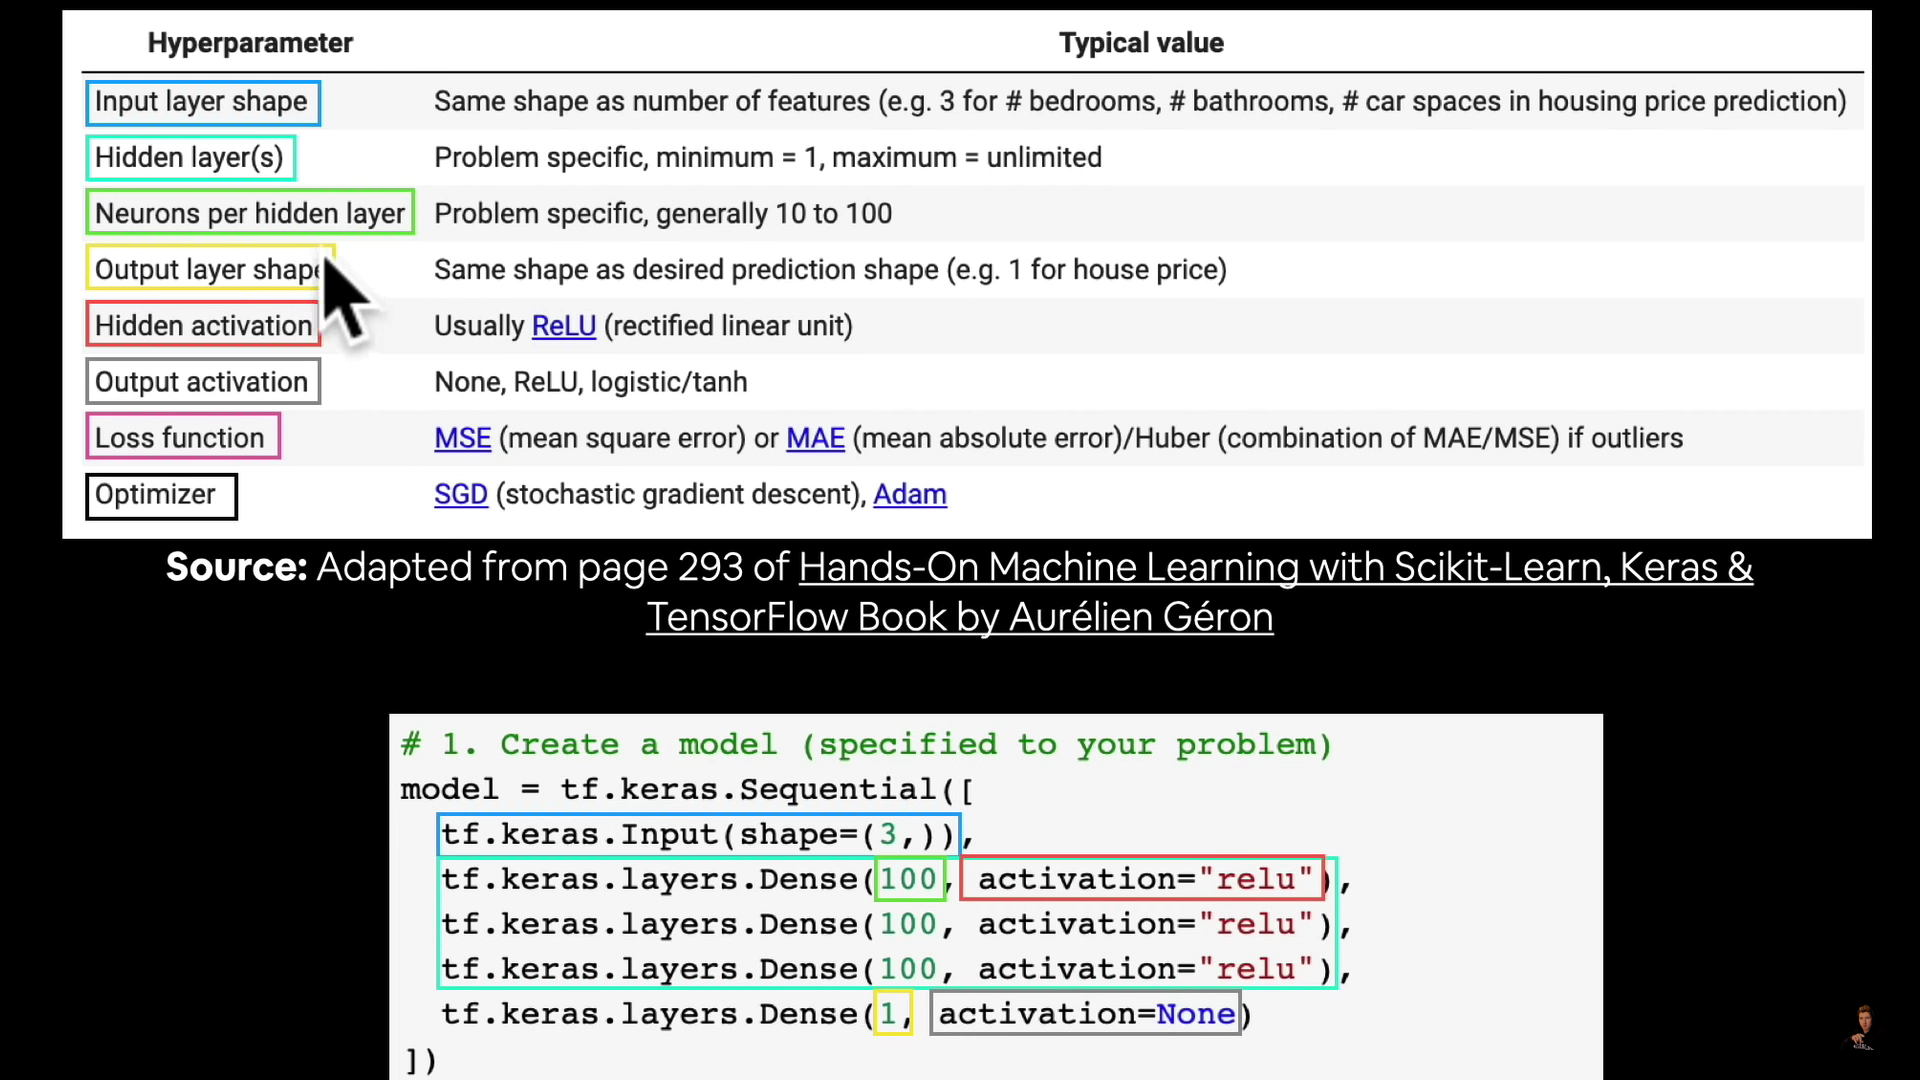